A/B Test – Call to Action (CTA) Wording

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# simulate data
np.random.seed(2025)
n=1200

In [3]:
data = pd.DataFrame({
    'user_id': range(1, n+1),
    'cta_group':np.random.choice(['Buy Now', 'Get Started'], size=n),
    'device_type':np.random.choice(['desktop', 'mobile'], size=n),
    'time_on_page':np.random.normal(60, 15, size=n)
})

In [4]:
# Simulate clicks (Did they click the button?)
def simulate_click(row):
    base_prob = 0.10 if row['cta_group'] == 'Buy Now' else 0.14
    base_prob += 0.03 if row['device_type'] == 'desktop' else 0
    base_prob += 0.001 * (row['time_on_page'] - 60)
    return np.random.rand() < base_prob

- People seeing “Get Started” are a bit more likely to click
- People on desktop might click more
- If they spend more time, they might also click more

In [5]:
# apply this for each user
data['clicked'] = data.apply(simulate_click, axis=1).astype(int)

In [6]:
# Show basic stats
summary = data.groupby('cta_group')['clicked'].agg(['mean', 'sum', 'count'])
summary.columns = ['Percent of Clicks', 'Total Clicks', 'Total User']
print("Summary Statistics:\n", summary)

Summary Statistics:
              Percent of Clicks  Total Clicks  Total User
cta_group                                               
Buy Now               0.110390            68         616
Get Started           0.138699            81         584


This tells us:
- What percent of users in each group clicked the button
- How many total clicks
- How many users saw each version

C:\Users\shilpa\AppData\Local\Temp\ipykernel_1156\3953087902.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='cta_group',
C:\Users\shilpa\AppData\Local\Temp\ipykernel_1156\3953087902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cta_group',


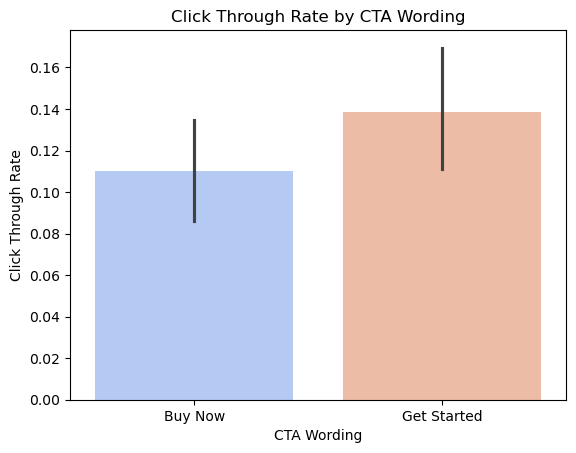

In [7]:
# Draw the chart
sns.barplot(x='cta_group',
           y='clicked',
           data=data,
           ci=95,
           palette='coolwarm')
plt.title('Click Through Rate by CTA Wording')
plt.ylabel('Click Through Rate')
plt.xlabel('CTA Wording')
plt.show()

- This draws a bar chart comparing click rates for “Buy Now” vs “Get Started”

In [8]:
# Test if the Difference is Real (Chi-Square)
contingency = pd.crosstab(data['cta_group'], data['clicked'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Squared Test: ")
print(f"Chi2 = {chi2:.4f}, p-value = {p:.4f}")
print("Significant difference? ", "yes" if p<0.05 else "no")

Chi-Squared Test: 
Chi2 = 1.9566, p-value = 0.1619
Significant difference?  no


- statistical test to see if the difference in clicks between the two CTAs is just luck or real.
- If the p-value is less than 0.05 → the difference is probably real (statistically significant).

In [9]:
# Logistic Regression
model = smf.logit("clicked ~ C(cta_group) + C(device_type) + time_on_page", data=data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.371493
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                clicked   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 May 2025   Pseudo R-squ.:                0.009735
Time:                        16:23:19   Log-Likelihood:                -445.79
converged:                       True   LL-Null:                       -450.17
Covariance Type:            nonrobust   LLR p-value:                   0.03259
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.8111      0.390     -7.200      0.000   

RESULT
- "Get Started" performed slightly better than "Buy Now", but the difference is not statistically significant (p = 0.125).